# How to use Control toolbox in Python

In [17]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from scipy.signal import butter
from control.matlab import tf, ss, ss2tf, bode, step, initial, lsim, margin, impulse

Basic file found
Running Python: 3.8.19
Running Sympy: 1.12.1
Control Package Found


In [18]:
# define P as a transfer function
P = tf([0, 4],[1,2,3])
P

TransferFunction(array([4]), array([1, 2, 3]))

In [19]:
# Second approach
s = tf('s')
P = 4/(s**2 + 2*s + 3)
P

TransferFunction(array([4]), array([1, 2, 3]))

In [20]:
# third approach
A = [[0, 1],[-3, -2]]
B = [[0],[1]]
C = [[4, 0],[0, 1]]
D = [[0],[0]]
Pss = ss(A,B,C,D)
Pss

<LinearIOSystem:sys[38]:['u[0]']->['y[0]', 'y[1]']>

In [21]:
# remove weird scaling artifacts
def near_zero(P, Tol = 1e-12):
    P.num[0][0] = [x if abs(x) > Tol else 0.0 for x in P.num[0][0]]
    return P

In [22]:
P = ss2tf(A,B,C[0][:],D[0][:]) # to be consistent with the above
# fix some poor scaling
P = near_zero(P)
P

TransferFunction([4.0], array([   1.000,    2.000,    3.000]))

# Try some plotting

In [23]:
t = np.arange(0,10,0.01)
y,t = impulse(Pss,t)

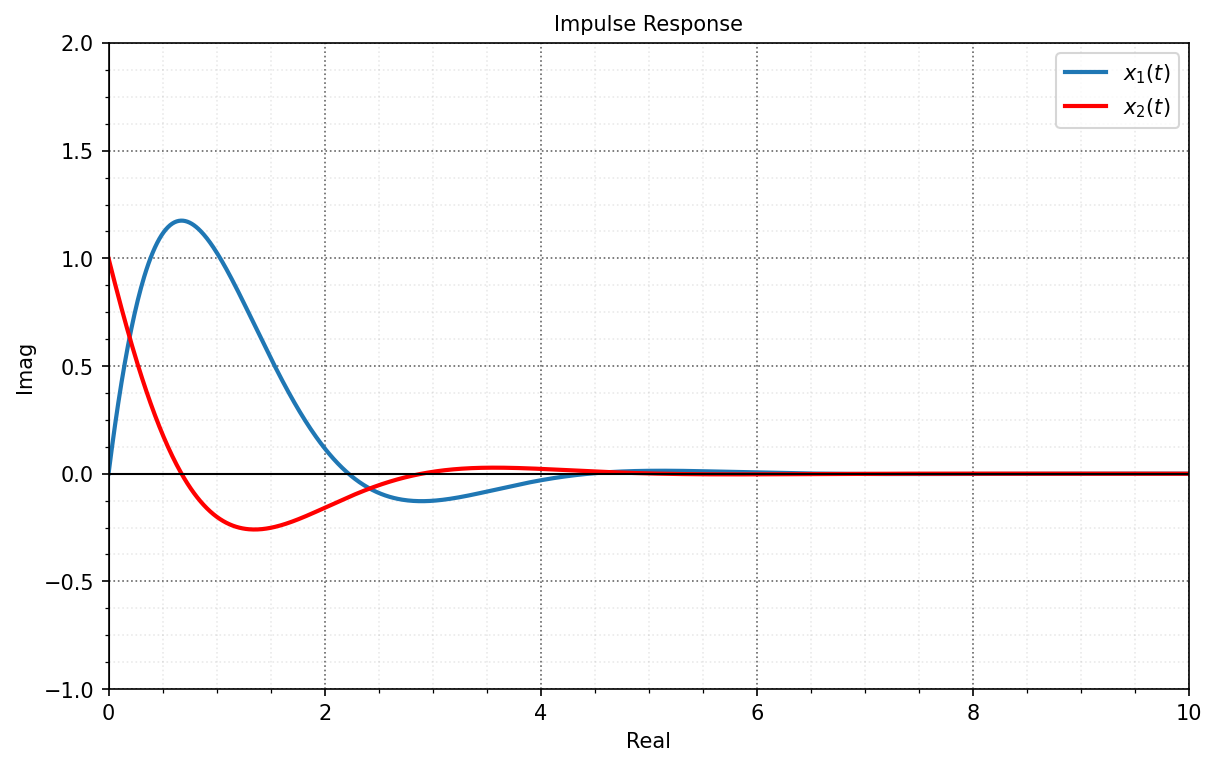

In [ ]:
fig, ax = ax[0].subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t,y[:,0],label='$x_1(t)$')
ax[0].plot(t,y[:,1],'r',label='$x_2(t)$')
ax[0].minorticks_on()
ax[0].xlim(0,10)
ax[0].ylim(-1,2)
ax[0].xlabel('Real')
ax[0].ylabel('Imag')
ax[0].title('Impulse Response')
nicegrid(ax)
ax[0].legend()
ax[0].show()

In [25]:
t = np.arange(0,10,0.001)
y,t = step(Pss,t)

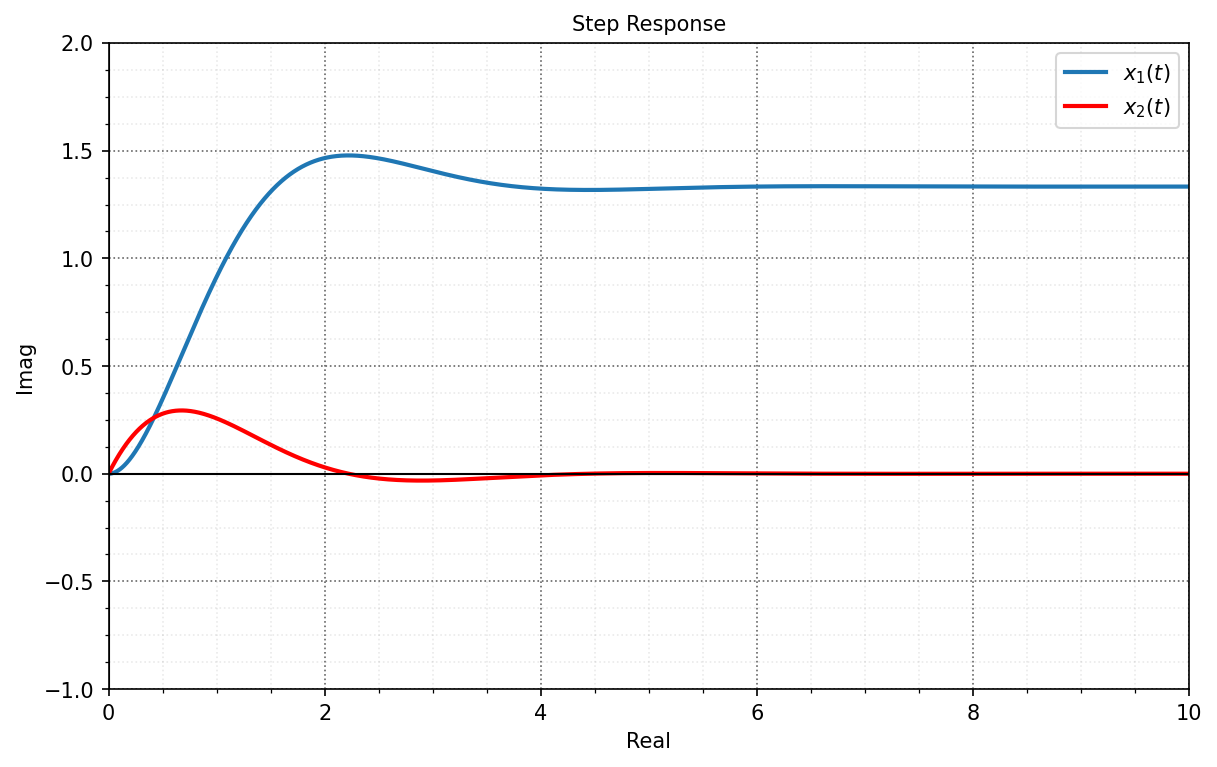

In [ ]:
fig, ax = ax[0].subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t,y[:,0],label='$x_1(t)$')
ax[0].plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid(ax)
ax[0].legend()
ax[0].xlim(0,10)
ax[0].ylim(-1,2)
ax[0].xlabel('Real')
ax[0].ylabel('Imag')
ax[0].title('Step Response')
ax[0].show()


In [27]:
X0 = [0, -1]
y,t = initial(Pss,t,X0)

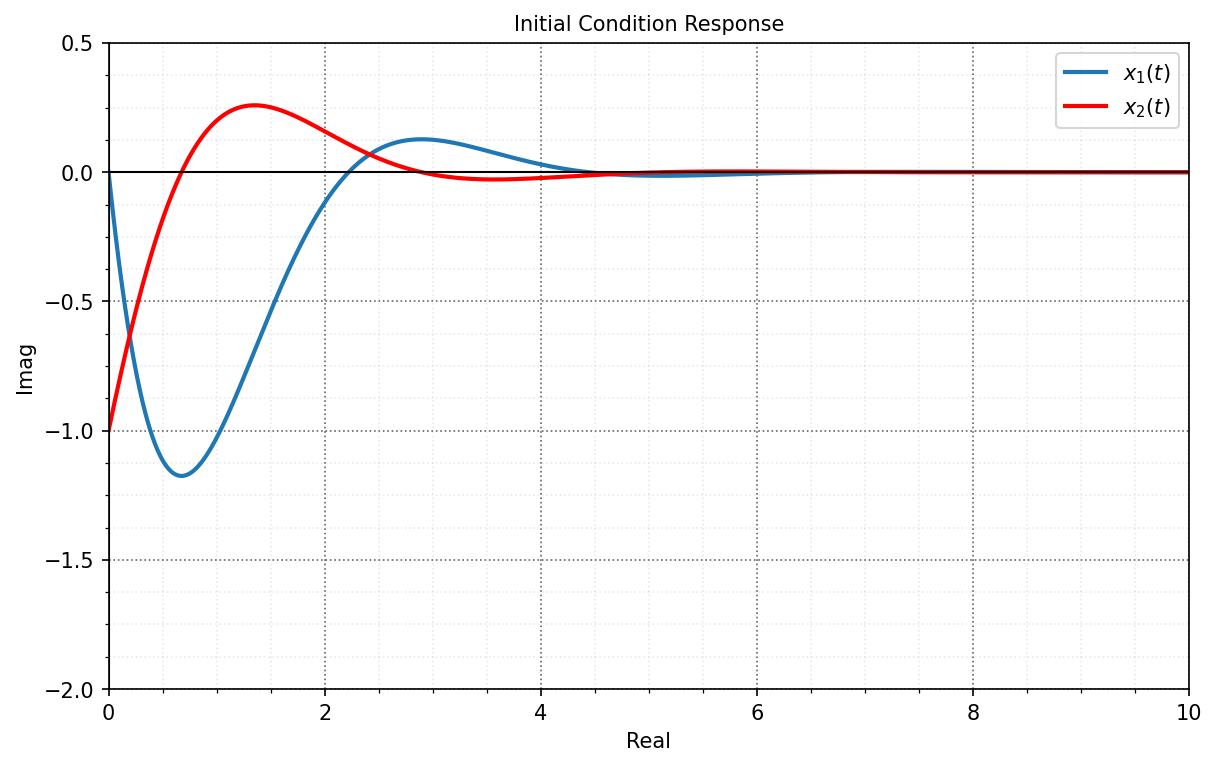

In [ ]:
fig, ax = ax[0].subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t,y[:,0],label='$x_1(t)$')
ax[0].plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid(ax)
ax[0].legend()
ax[0].xlim(0,10)
ax[0].ylim(-2,0.5)
ax[0].xlabel('Real')
ax[0].ylabel('Imag')
ax[0].title('Initial Condition Response')
ax[0].show()

In [29]:
U = np.sin(5*2*np.pi*t)
y,t,xout = lsim(Pss,U,t,X0)

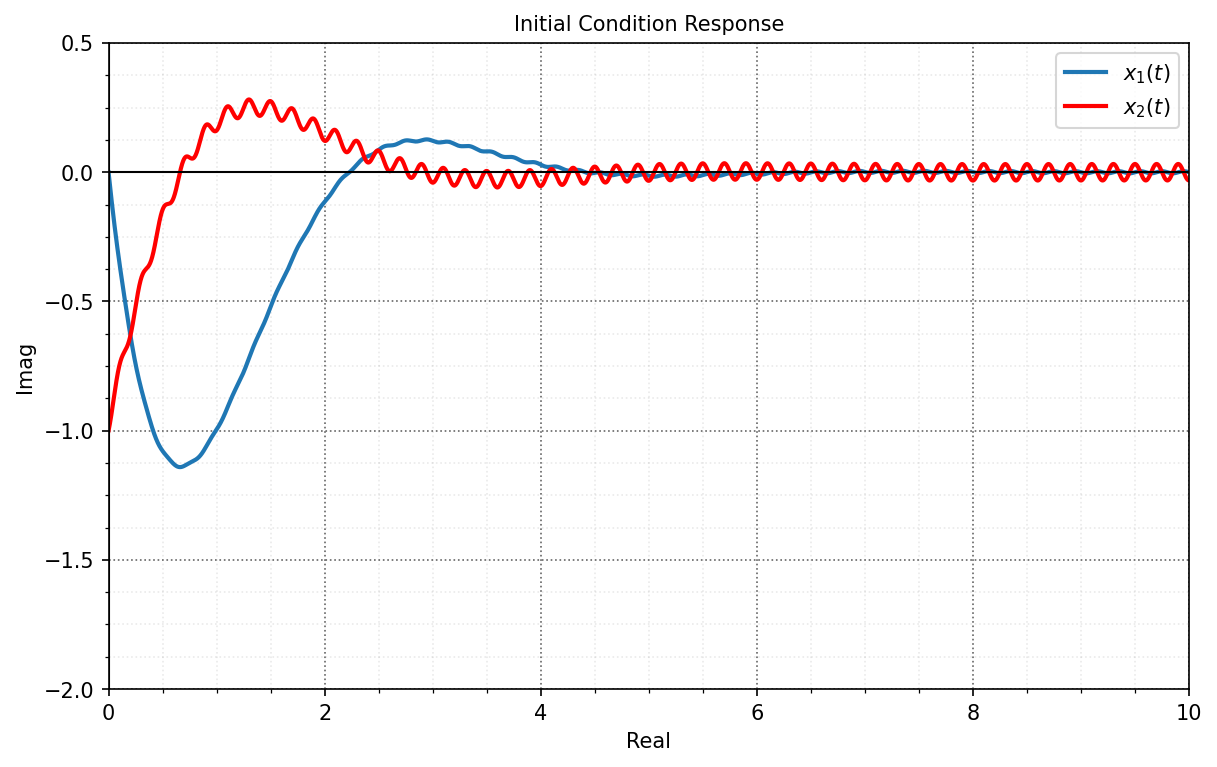

In [ ]:
fig, ax = ax[0].subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t,y[:,0],label='$x_1(t)$')
ax[0].plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid(ax)
ax[0].legend()
ax[0].xlim(0,10)
ax[0].ylim(-2,0.5)
ax[0].xlabel('Real')
ax[0].ylabel('Imag')
ax[0].title('Initial Condition Response')
ax[0].show()


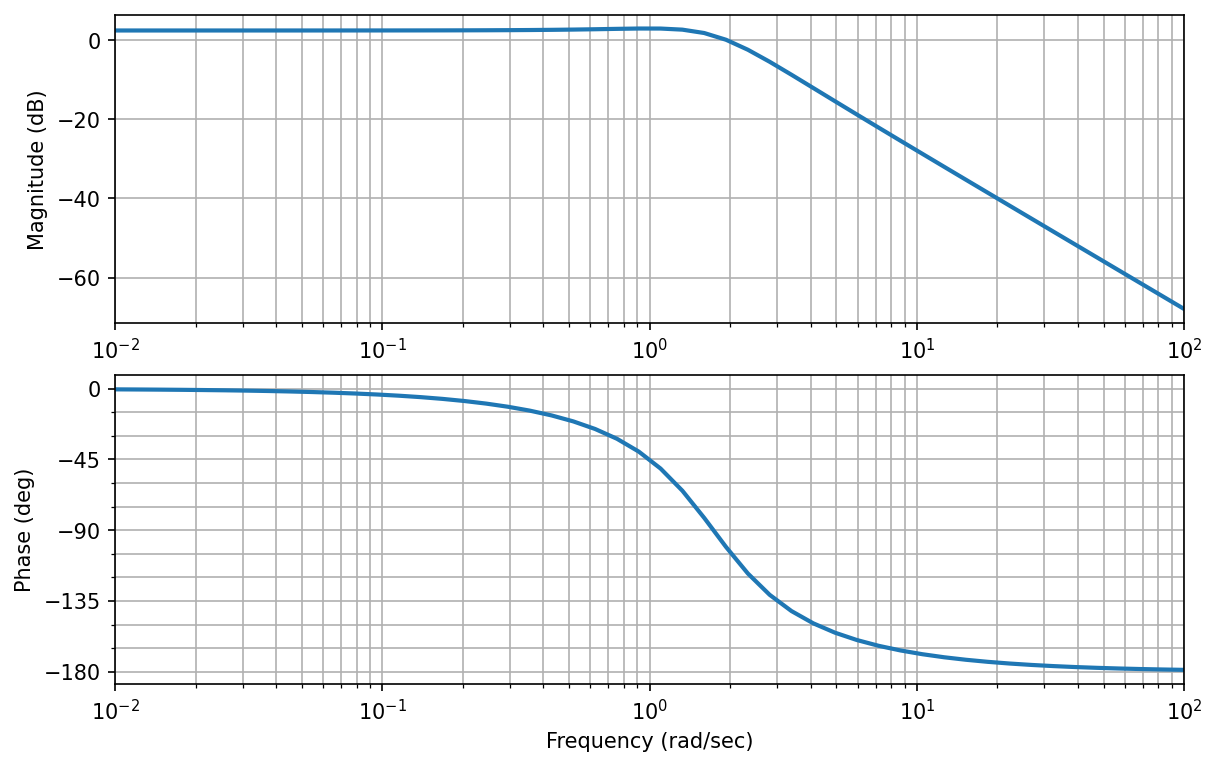

In [ ]:
s = tf('s')
P = 4/(s**2 + 2*s + 3)
fig, ax = ax[0].subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
gain, phase, w = bode(P, logspace(-2,2))
ax[0].xlim(.01,100)
ax[0].show()

In [32]:
GM, PM, wpc, wgc = margin(P)
print(f'GM = {20*np.log10(GM):2f}')
print(f'PM = {PM:2f}')
print(f'wpc = {wpc:2f}')
print(f'wgc = {wgc:2f}')


GM = inf
PM = 78.047144
wpc = nan
wgc = 1.956637


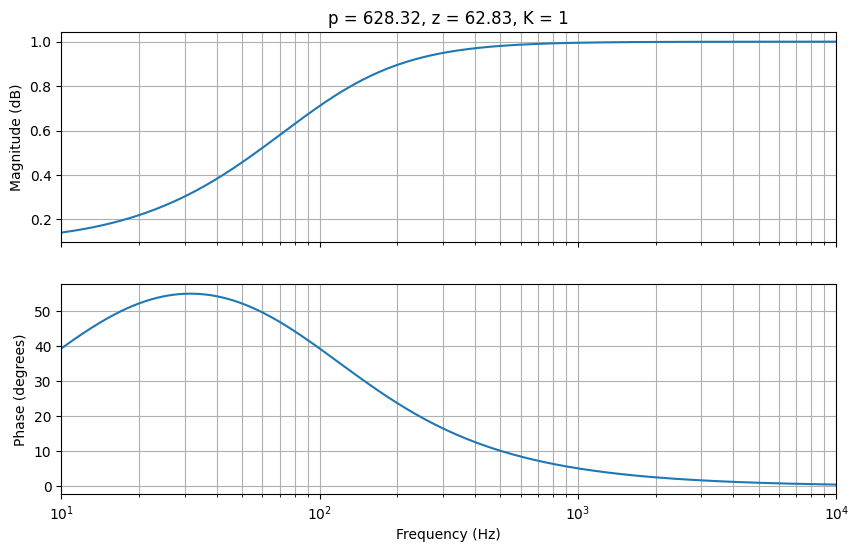

In [49]:
# Quick example of plotting for a Lead Compensator

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define lead compensator parameters
K = 1         # Gain
z = 10*2*np.pi         # Zero at s = -10 Hz
p = 100*2*np.pi         # Pole at s = -100 Hz

# Define transfer function G(s) = K * (s + z) / (s + p)
num = [K, K * z]  # Numerator coefficients (s + z)
den = [1, p]      # Denominator coefficients (s + p)
G = ctrl.tf(num, den)

f = np.logspace(1, 4, 1000)
w = 2*np.pi*f
j = complex(0,1)
Gf = G(j*w)

# Generate Bode plot
fig, ax = plt.subplots(2, 1, figsize=(10, 6),sharex=True)
mag, phase = np.abs(Gf), np.angle(Gf)
ax[0].semilogx(f, mag)
ax[0].set_title('Bode Plot')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].grid(which='both', axis='both')
ax[1].semilogx(f, phase * 180 / np.pi)
ax[1].set_ylabel('Phase (degrees)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].grid(which='both', axis='both')
ax[1].set_xlim(min(f),max(f))
ax[0].set_title(f"p = {p:.2f}, z = {z:.2f}, K = {K}")
plt.show()

## Quick Example of the impact of Free Integrators on the response of a system

1 states have been removed from the model
Type 0 System -6.000
2 states have been removed from the model
Type 1 System (-1.50 + 1.32i), (-1.50 + -1.32i)


/Users/jonathanhow/Jon/venv312/lib/python3.12/site-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


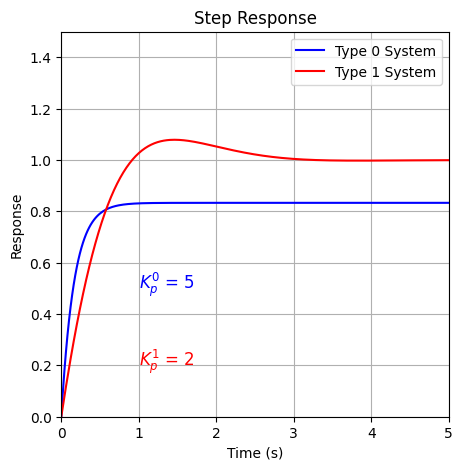

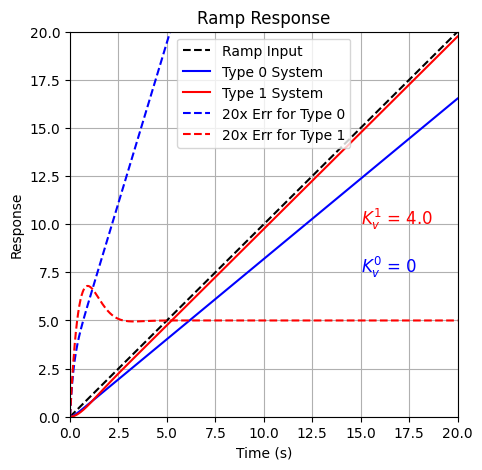

In [33]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from control_materials import *

# Define the type 0 system (no integrator)
num0 = [1]
den0 = [1, 1]
G0 = ctrl.tf(num0, den0)

# Define the type 1 system (one integrator)
num1 = [1]
den1 = [1, 1, 0]
G1 = ctrl.tf(num1, den1)

# Stabilize the type 0 system with a proportional controller
Kp0 = 5
C0 = ctrl.tf([Kp0], [1])
L0 = C0 * G0
G0_cl = control.minreal(L0/(1+L0))
pretty_row_print(G0_cl.poles(), 'Type 0 System ')

# Stabilize the type 1 system with a proportional controller
Kp1 = 2
C1 = ctrl.tf([Kp1, 2*Kp1], [1])
L1 = C1 * G1
G1_cl = control.minreal(L1/(1+L1))
pretty_row_print(G1_cl.poles(), 'Type 1 System ')

Kv0 = find_Kv(L0)
Kv1 = find_Kv(L1)

# Time vector for simulation
t = np.linspace(0, 20, 1000)

# Step response
y0_step,_ = ctrl.matlab.step(G0_cl, t)
y1_step,_ = ctrl.matlab.step(G1_cl, t)

# Ramp response
y0_ramp,_,_ = ctrl.matlab.lsim(G0_cl, t, t)
y1_ramp,_,_ = ctrl.matlab.lsim(G1_cl, t, t)

# Plot step responses
plt.figure(figsize=(5, 5))
plt.plot(t,y0_step, 'b',label='Type 0 System')
plt.plot(t, y1_step, 'r',label='Type 1 System')
plt.title('Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.xlim([0, 5])
plt.ylim([0, 1.5])
plt.text(1, .5, f'$K_p^0$ = {Kp0}', fontsize=12, color='blue')
plt.text(1, .2, f'$K_p^1$ = {Kp1}', fontsize=12, color='red')
plt.legend()
plt.grid()
plt.savefig('figs/step_ramp_response_plot0.pdf',dpi=600)

# Plot ramp responses
plt.figure(figsize=(5, 5))
plt.plot(t,t,'k--',label='Ramp Input')
plt.plot(t, y0_ramp, 'b',label='Type 0 System')
plt.plot(t, y1_ramp, 'r',label='Type 1 System')
plt.plot(t, 20*(t-y0_ramp), 'b--',label='20x Err for Type 0')
plt.plot(t, 20*(t-y1_ramp), 'r--',label='20x Err for Type 1')
plt.title('Ramp Response')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.legend()
plt.text(15, 7.5, f'$K_v^0$ = {Kv0}', fontsize=12, color='blue')
plt.text(15, 10, f'$K_v^1$ = {Kv1}', fontsize=12, color='red')
plt.grid()

plt.savefig('figs/step_ramp_response_plot1.pdf',dpi=600)
plt.show()

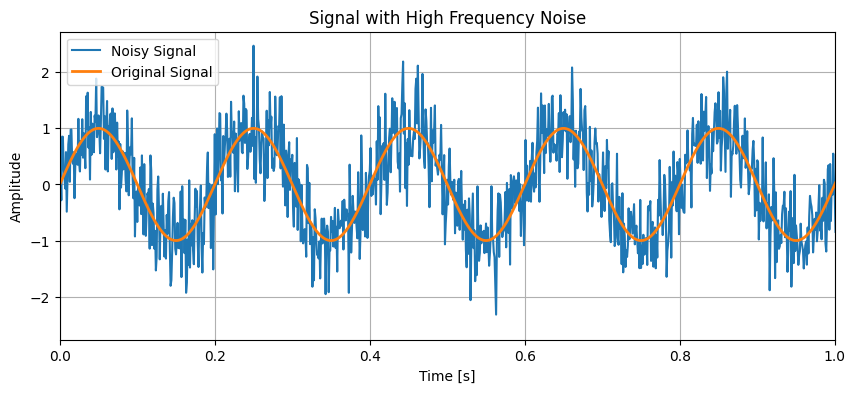

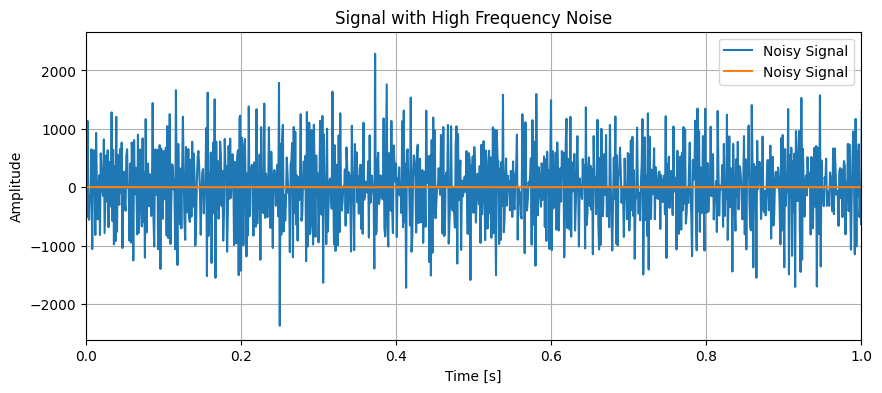

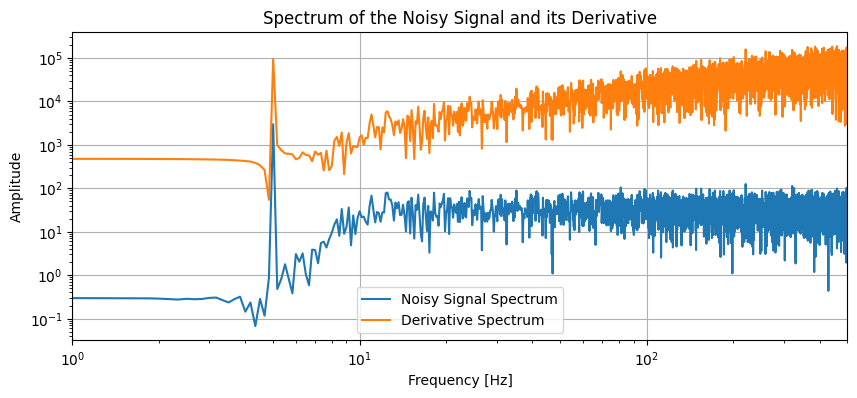

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Create a time vector
dt = 0.001  # Time step
t = np.arange(0, 6, dt)  # Time vector
N = len(t)  # Number of samples
frequencies = np.fft.fftfreq(N, dt)  # Frequency vector

# Create a signal (e.g., a sine wave)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
# Design a high-pass filter
b, a = butter(6, 10, btype='high', fs=1/dt)  # 4th order Butterworth filter with 100 Hz cutoff
# Generate high frequency noise
noise = 0.5 * np.random.randn(len(t))  # Gaussian noise
# Apply the high-pass filter to the noise
filtered_noise = lfilter(b, a, noise)

# Add the filtered noise to the signal
noisy_signal = signal + filtered_noise
derivative_noisy_signal = np.diff(noisy_signal) / np.diff(t)

spectrum = np.fft.fft(noisy_signal)
spectrum_derivative = np.fft.fft(derivative_noisy_signal)

Nf = len(spectrum_derivative)
Ns = len(spectrum)

# Plot the noisy signal
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time [s]')
plt.xlim(0,1)
plt.ylabel('Amplitude')
plt.title('Signal with High Frequency Noise')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t[:-1], derivative_noisy_signal, label='Noisy Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal with High Frequency Noise')
plt.xlim(0,1)
plt.legend()
plt.grid()
plt.show()

# Compute the Fourier Transform of the derivative of the noisy signal
# Plot the spectrum of the noisy signal and its derivative
plt.figure(figsize=(10, 4))
plt.loglog(frequencies[:-(Ns//2)], np.abs(spectrum)[:-(Ns//2)], label='Noisy Signal Spectrum')
plt.loglog(frequencies[:-(Nf//2+1)], np.abs(spectrum_derivative)[:-(Nf//2)], label='Derivative Spectrum')
plt.xlim(1, 1/dt/2)  # Limit x-axis to positive frequencies
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum of the Noisy Signal and its Derivative')
plt.legend()
plt.grid()
plt.show()